In [3]:
! conda list opencv-python

# packages in environment at /home/kim/miniconda3/envs/yolo_env:
#
# Name                     Version          Build            Channel
opencv-python              4.12.0.88        pypi_0           pypi


In [4]:
%pwd # 현재 작업 디렉토리 확인

'/home/kim/Desktop/AI_cours/강의_7기_AI응용_1차시_OpenCV 기반 이미지 처리 기초'

In [5]:
path = '/home/kim/Desktop/AI_cours/data/wafer.jpg'

In [6]:
import os
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [7]:
src = cv2.imread(path)

In [ ]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # BGR -> GRAY 변환

array([[162, 126, 134, ..., 115, 110, 162],
       [139,  75,  74, ...,   0,  12, 106],
       [120,  22,  21, ...,   0,   5, 112],
       ...,
       [117,   0,   0, ...,   1,   1, 114],
       [108,  11,   2, ...,   1,   6, 109],
       [158, 109, 106, ..., 114, 108, 161]], shape=(420, 420), dtype=uint8)

In [ ]:
dst = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) # BGR -> RGB 변환

print(f'차원(channel): {dst.ndim}')
print(f'형태(shape): {dst.shape}')
print(f'데이터타입(dtype): {dst.dtype}')
# uint8: 0~255

차원(channel): 3
형태(shape): (420, 420, 3)
데이터타입(dtype): uint8


In [12]:
save_path = '/home/kim/Desktop/AI_cours/data/wafer_complete.jpg'

In [13]:
cv2.imwrite(save_path, dst)

True

**3차원이 뭐예요?** 📦

**차원별 의미:**
1. **1차원 (높이)**: 이미지의 세로 (위↔아래)
2. **2차원 (너비)**: 이미지의 가로 (좌↔우)
3. **3차원 (채널)**: 색상 정보 (R, G, B 3가지)

**비유로 이해하기:**
- 아파트 주소를 생각해보세요
  - 1차원: 101호, 102호, 103호... (일렬)
  - 2차원: 1층 101호, 2층 201호... (평면)
  - 3차원: A동 1층 101호, B동 2층 201호... (입체)

**흑백 vs 컬러:**
```
흑백 사진 = 2차원 [높이][너비]
컬러 사진 = 3차원 [높이][너비][RGB 3개]
```

uint8 의미는?

- unsigned : 부호(+,-) 없음 (음수 없음, 0 이상만)
- 8 : 2^8 = 256 (즉, 256가지 값으로 표현)
- 256 값 >> 0-255 범위 갖는다
- 0: 완전 어두워(검정), 255: 완전 밝아 (하양)


In [14]:
src.ndim

3

In [15]:
if src.ndim == 2:
    print("흑백사진")
elif src.ndim == 3:
    print("칼라사진")

칼라사진


In [16]:
src_resized = cv2.resize(src, (224,224))

In [ ]:
# 이미지 데이터 증강 및 변환 등 전처리 권장
# 1. 이미지 로드
# 2. 색상 공간 변환(RGB, GRAY 변환)
# 3. 이미지 크기 조정 (2의 제곱 크기 권장: 32, 64, 128, 256, 512 ...)
# 4. 데이터 타입 변환 (uint8 -> float32 -> 정규화 0~1 사이 값으로 변환)
# 5. 차원 변경 (HWC -> CHW)

In [20]:
src.shape

(420, 420, 3)

In [18]:
height,width = src.shape[:2]
print(f'높이: {height}, 너비: {width}')

높이: 420, 너비: 420


In [21]:
if width != 224 or height != 224:
    src = cv2.resize(src, (224,224))

In [22]:
src.shape

(224, 224, 3)

In [ ]:
src.astype('float')

In [ ]:
cv2.add(src, 100)

In [27]:
type(src)

numpy.ndarray

In [ ]:
cv2.subtract(src, 100)

In [28]:
image = src.copy()

In [29]:
image.shape

(224, 224, 3)

In [30]:
# s>1: 이미지가 더 밝아지고, 대비가 강해짐 >> 이미지가 더 선명해짐
# s<1: 이미지가 더 어두워지고, 대비가 약해짐 >> 이미지가 더 흐려짐

s = 2
dst1 = cv2.multiply(src, 2)

In [ ]:
# cv2.imshow('dst', src)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [37]:
dst = np.empty(src.shape, src.dtype)

for y in range(src.shape[0]):
    for x in range(src.shape[1]):
        dst[y,x] = src[y,x] + 50

In [41]:
src.dtype

dtype('uint8')

In [ ]:
# cv2.imshow('dst', dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
np.clip(src.astype(np.uint16)+50, 0, 225).astype(np.uint8)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(src)
plt.subplot(1,2,2)
plt.imshow(dst)

논리 연산
- AND(교집합) : 둘다 True(1)
- OR(합집합) : 둘다 False(0)여야 False / 하나만 True 여도 True
- XOR(~합집합) : 하나가 True면 다른 하나가 False 여야 True
- NOT (원래 값 뒤집는 것)

In [60]:
img1 = np.zeros((200,200), dtype=np.uint8)
img2 = np.zeros((200,200), dtype=np.uint8)

# 도형 그리기
# cv2.rectangle(이미지, 시작점 좌표(x,y), 끝점 좌표(x,y), 색상(BGR), 두께)
rec = cv2.rectangle(img1, (50,50), (150,150), 125, -1) # 흰색 사각형 채우기
# cv2.circle(이미지, 중심 좌표(x,y), 반지름, 색상(BGR), 두께)
cir = cv2.circle(img2, (100,100), 50, 255, 8) # 흰색 원 채우기

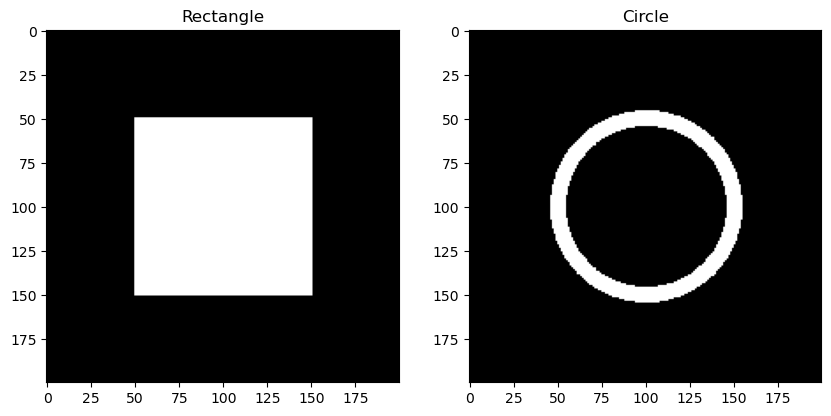

In [61]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(rec, cmap='gray')
ax[1].imshow(cir, cmap='gray')
ax[0].set_title('Rectangle')
ax[1].set_title('Circle')
plt.show()

In [82]:
img1 = np.zeros((200,200,3), dtype=np.uint8)
rec = cv2.rectangle(img1, (50,50), (150,150), (255,0,0), -1) # BGR 색상 지정
img2 = np.zeros((200,200,3), dtype=np.uint8)
cir = cv2.circle(img2, (100,100), 60, (255,255,0), -1) # BGR 색상 지정

In [83]:
# cv2.imshow('dst', cir)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

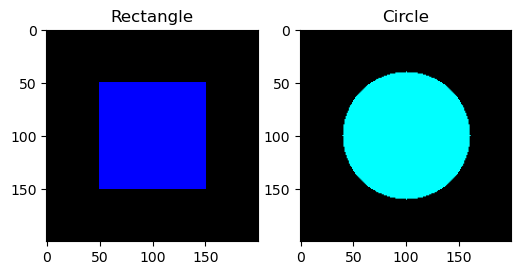

In [84]:
fig, axes = plt.subplots(1,2, figsize=(6,3))

axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Rectangle')
axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Circle')
plt.show()

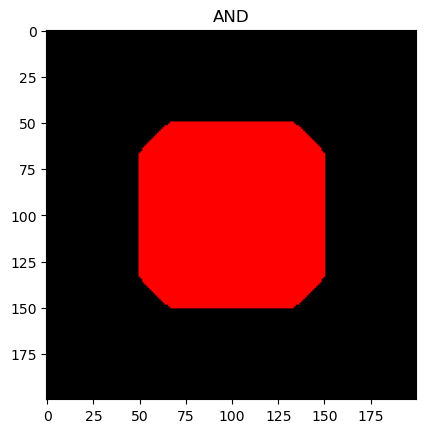

In [85]:
# AND 교집합

_ = cv2.bitwise_and(img1, img2)

plt.imshow(_)
plt.title('AND')
plt.show()

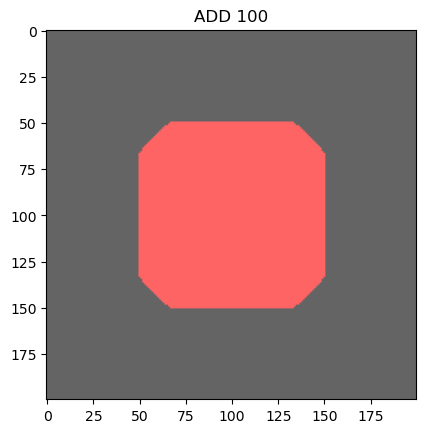

In [88]:
# 
_ = cv2.bitwise_and(img1, img2)

cv2.add(_, 50)
plt.imshow(cv2.add(_, 100))
plt.title('ADD 100')
plt.show()

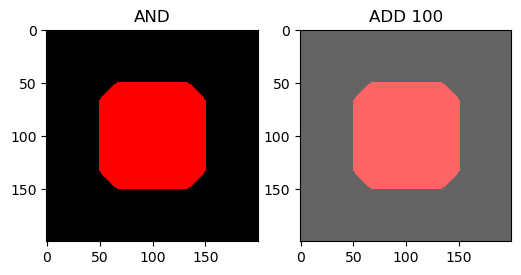

In [90]:
# 
_ = cv2.bitwise_and(img1, img2)

fig, axes = plt.subplots(1,2, figsize=(6,3))

axes[0].imshow(_)
axes[0].set_title('AND')
axes[1].imshow(cv2.add(_, 100))
axes[1].set_title('ADD 100')
plt.show()

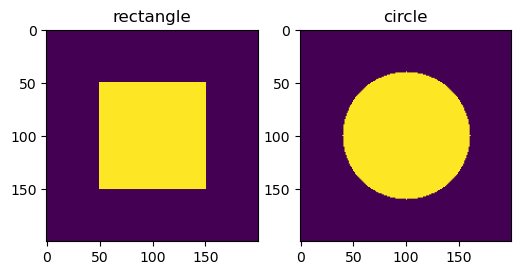

In [97]:
#도형을 생성함
#np.zeros(크기, 데이터타입) = 0이라는 값으로 채워진 '크기' 만큼의 데이터를 만듦
img1 = np.zeros((200, 200), dtype=np.uint8)
img2 = np.zeros((200, 200), dtype=np.uint8)

#도형 그리기
#cv2.사각형(어느 이미지 위에 그릴건지, (시작점 x, y), (끝점의 x, y),
#                                                        색깔, 선의 두께(-1이면, 안을 채움))
cv2.rectangle(img1, (50, 50), (150, 150), (10, 125, 30), -1)
#cv2.원(어느 이미지 위에 그릴지, (원의 중심좌표), 반지름 길이, 색깔, 선의 두께)
cv2.circle(img2, (100,100), 60, (40,170,70), -1)

#matplotlib의 여러 개 그래프 동시에 그리기
fig, axes = plt.subplots(1, 2, figsize=(6,3))

axes[0].imshow(img1)
axes[0].set_title('rectangle')

axes[1].imshow(img2)
axes[1].set_title('circle')
plt.show()

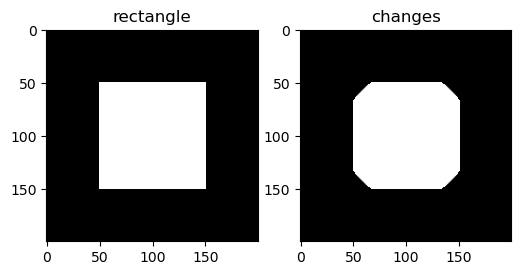

In [98]:
#AND연산(교집합) -> 겹치는 부분만 그림에 남는다.
bit_and = cv2.bitwise_and(img1, img2)
bit_and = cv2.add(bit_and, 100)
fig, axes = plt.subplots(1, 2, figsize=(6,3))

axes[0].imshow(img1, cmap='gray')
axes[0].set_title('rectangle')

axes[1].imshow(bit_and, cmap='gray')
axes[1].set_title('changes')
plt.show()

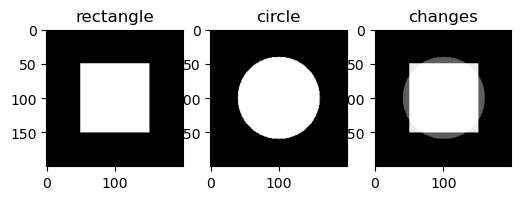

In [109]:
img1 = np.zeros((200, 200), dtype=np.uint8)
img2 = np.zeros((200, 200), dtype=np.uint8)

#도형 그리기
#cv2.사각형(어느 이미지 위에 그릴건지, (시작점 x, y), (끝점의 x, y),
#                                                        색깔, 선의 두께(-1이면, 안을 채움))
cv2.rectangle(img1, (50, 50), (150, 150), 100, -1)
#cv2.원(어느 이미지 위에 그릴지, (원의 중심좌표), 반지름 길이, 색깔, 선의 두께)
cv2.circle(img2, (100,100), 60, 40, -1)

bit_xor = cv2.bitwise_or(img1, img2)

fig, axes = plt.subplots(1, 3, figsize=(6,3))

axes[0].imshow(img1, cmap='gray')
axes[0].set_title('rectangle')

axes[1].imshow(img2, cmap='gray')
axes[1].set_title('circle')


axes[2].imshow(bit_xor, cmap='gray')
axes[2].set_title('changes')
plt.show()


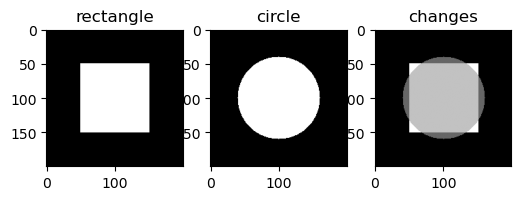

In [110]:
img1 = np.zeros((200, 200), dtype=np.uint8)
img2 = np.zeros((200, 200), dtype=np.uint8)

#도형 그리기
#cv2.사각형(어느 이미지 위에 그릴건지, (시작점 x, y), (끝점의 x, y),
#                                                        색깔, 선의 두께(-1이면, 안을 채움))
cv2.rectangle(img1, (50, 50), (150, 150), 100, -1)
#cv2.원(어느 이미지 위에 그릴지, (원의 중심좌표), 반지름 길이, 색깔, 선의 두께)
cv2.circle(img2, (100,100), 60, 40, -1)

bit_xor = cv2.bitwise_xor(img1, img2)

fig, axes = plt.subplots(1, 3, figsize=(6,3))

axes[0].imshow(img1, cmap='gray')
axes[0].set_title('rectangle')

axes[1].imshow(img2, cmap='gray')
axes[1].set_title('circle')


axes[2].imshow(bit_xor, cmap='gray')
axes[2].set_title('changes')
plt.show()

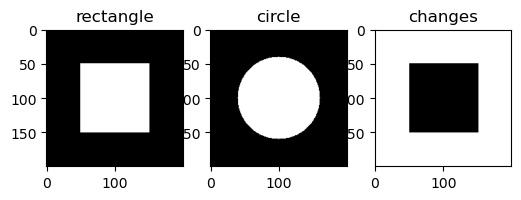

In [112]:
img1 = np.zeros((200, 200), dtype=np.uint8)
img2 = np.zeros((200, 200), dtype=np.uint8)

#도형 그리기
#cv2.사각형(어느 이미지 위에 그릴건지, (시작점 x, y), (끝점의 x, y),
#                                                        색깔, 선의 두께(-1이면, 안을 채움))
cv2.rectangle(img1, (50, 50), (150, 150), 100, -1)
#cv2.원(어느 이미지 위에 그릴지, (원의 중심좌표), 반지름 길이, 색깔, 선의 두께)
cv2.circle(img2, (100,100), 60, 40, -1)

bit_not = cv2.bitwise_not(img1)

fig, axes = plt.subplots(1, 3, figsize=(6,3))

axes[0].imshow(img1, cmap='gray')
axes[0].set_title('rectangle')

axes[1].imshow(img2, cmap='gray')
axes[1].set_title('circle')


axes[2].imshow(bit_not, cmap='gray')
axes[2].set_title('changes')
plt.show()